# What is Jupyter?

## Introduction

The [Jupyter Notebook](http://jupyter.org/) is an **interactive computing environment**
that enables users to create and share documents that contain
live (runnable) code, equations, visualizations, interactive plugins, and explanatory text.
Some important features of the Jupyter notebook are:

1.  **Data cleaning and exploration**: Jupyter offers a rich, interactive computing environment
    where users can load, clean, analyze and visualize their data.
    Jupyter also supports interactive plugins--or "widgets"--for exploring datasets in real-time.
    
2.  **Prototyping and algorithm development**: Jupyter Notebooks are the perfect environment
    for exploratory analyses, algorithm development and prototyping.
    Whether you are solving complex mathematical equations,
    or trying to improve the performance of your code,
    the interactive Notebook interface allows you to prototype changes quickly and get immediate feedback.
   
3.  **Reproducible research**: Jupyter Notebooks are a complete and self-contained record of a computation
    or pipeline, that can be converted to various formats and shared with others using
    email,
    [Dropbox](http://dropbox.com),
    [GitHub](http://github.com) or the
    [nbviewer](http://nbviewer.jupyter.org).

4.  **Multi-language support**: Jupyter supports several languages used in scientific computing
    and data analysis, including Python, R, ScaLa, Julia and
    [many more](https://github.com/ipython/ipython/wiki/IPython-kernels-for-other-languages).

## Jupyter for Palmetto

Jupyter is free and open-source software that you can
[install on your own computer](http://jupyter.readthedocs.io/en/latest/install.html).
For research code and data that lives on the Palmetto cluster,
we provide the integration of [Jupyterhub](https://jupyterhub.readthedocs.io/en/latest/)
to the Palmetto cluster.
Using Jupyterhub, you can spawn a Notebook server running on the Palmetto,
which allows you to take advantage of the compute hardware and software available on the cluster.
Access Jupyter on Palmetto here:

                                https://webapp01-ext.palmetto.clemson.edu:8443

## Examples


### Running code

Jupyter allows you to write live code blocks
that can be run and re-run easily.

<IPython.core.display.Javascript object>


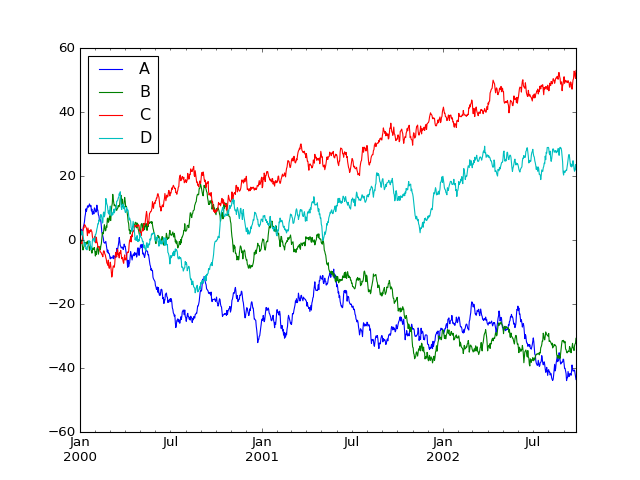

In [10]:
# To run this code block, just click on it and type `shift+Enter`.
# Every time you run this block,
# a new figure will be generated below.

%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot(); plt.legend(loc='best')

### Rich, formatted text

Jupyter supports [Markdown](https://daringfireball.net/projects/markdown/)
and LaTeX for text within Notebooks.
Thus, you can easily create formatted text, tables, and equations.


| Site | Temperature |
|------|-------------|
|   A2 | 20.18       |
|   C2 | 21.35       | 
|   B1 | 20.73       | 
|   A0 | 19.62       | 
|   C2 | 25.42       |

$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

### Including media

Jupyter also also allows you to refer to images or video on disk using HTML.
These do not get embedded into the Notebook.


<video controls src="images/planets.m4v", width=500px/>


## Architecture of the Jupyter Notebook

The Jupyter Notebook combines three components:

* **The notebook web application**: An interactive web application for writing and running code interactively and authoring notebook documents.
* **Kernels**: Separate processes started by the notebook web application that runs users' code in a given language and returns output back to the notebook web application. The kernel also handles things like computations for interactive widgets, tab completion and introspection. 
* **Notebook documents**: Self-contained documents that contain a representation of all content visible in the notebook web application, including inputs and outputs of the computations, narrative
text, equations, images, and rich media representations of objects. Each notebook document has its own kernel.

### Notebook web application

The notebook web application enables users to:

* **Edit code in the browser**, with automatic syntax highlighting, indentation, and tab completion/introspection.
* **Run code from the browser**, with the results of computations attached to the code which generated them.
* See the results of computations with **rich media representations**, such as HTML, LaTeX, PNG, SVG, PDF, etc.
* Create and use **interactive JavaScript widgets**, which bind interactive user interface controls and visualizations to reactive kernel side computations.
* Author **narrative text** using the [Markdown](https://daringfireball.net/projects/markdown/) markup language.
* Build **hierarchical documents** that are organized into sections with different levels of headings.
* Include mathematical equations using **LaTeX syntax in Markdown**, which are rendered in-browser by [MathJax](http://www.mathjax.org/).

### Kernels

Through Jupyter's kernel and messaging architecture, the Notebook allows code to be run in a range of different programming languages.  For each notebook document that a user opens, the web application starts a kernel that runs the code for that notebook. Each kernel is capable of running code in a single programming language and there are kernels available in the following languages:

* Python(https://github.com/ipython/ipython)
* Julia (https://github.com/JuliaLang/IJulia.jl)
* R (https://github.com/takluyver/IRkernel)
* Ruby (https://github.com/minrk/iruby)
* Haskell (https://github.com/gibiansky/IHaskell)
* Scala (https://github.com/Bridgewater/scala-notebook)
* node.js (https://gist.github.com/Carreau/4279371)
* Go (https://github.com/takluyver/igo)

The default kernel runs Python code. The notebook provides a simple way for users to pick which of these kernels is used for a given notebook. 

Each of these kernels communicate with the notebook web application and web browser using a JSON over ZeroMQ/WebSockets message protocol that is described [here](http://ipython.org/ipython-doc/dev/development/messaging.html). Most users don't need to know about these details, but it helps to understand that "kernels run code."

### Notebook documents

Notebook documents contain the **inputs and outputs** of an interactive session as well as **narrative text** that accompanies the code but is not meant for execution. **Rich output** generated by running code, including HTML, images, video, and plots, is embeddeed in the notebook, which makes it a complete and self-contained record of a computation. 

When you run the notebook web application on your computer, notebook documents are just **files on your local filesystem with a `.ipynb` extension**. This allows you to use familiar workflows for organizing your notebooks into folders and sharing them with others.

Notebooks consist of a **linear sequence of cells**. There are four basic cell types:

* **Code cells:** Input and output of live code that is run in the kernel
* **Markdown cells:** Narrative text with embedded LaTeX equations
* **Heading cells:** 6 levels of hierarchical organization and formatting
* **Raw cells:** Unformatted text that is included, without modification, when notebooks are converted to different formats using nbconvert

Internally, notebook documents are **[JSON](http://en.wikipedia.org/wiki/JSON) data** with **binary values [base64](http://en.wikipedia.org/wiki/Base64)** encoded. This allows them to be **read and manipulated programmatically** by any programming language. Because JSON is a text format, notebook documents are version control friendly.

**Notebooks can be exported** to different static formats including HTML, reStructeredText, LaTeX, PDF, and slide shows ([reveal.js](http://lab.hakim.se/reveal-js/#/)) using Jupyter's `nbconvert` utility.

Furthermore, any notebook document available from a **public URL on or GitHub can be shared** via [nbviewer](http://nbviewer.ipython.org). This service loads the notebook document from the URL and renders it as a static web page. The resulting web page may thus be shared with others **without their needing to install the Jupyter Notebook**.